In [1]:
import sys
sys.path.append('..')

In [2]:
from database import TextFiles
from analytics import create_article_df, groupby_newspaper

db = TextFiles('final')
articles = db.get_all_articles()

In [3]:
df = create_article_df(articles)
print(df.dtypes)

df.head()

newspaper                 object
body                      object
url                       object
id                        object
published    datetime64[ns, UTC]
modified                  object
dtype: object


,newspaper,body,url,id,published,modified
0,fox,Throughout my 40 year career as a meteorologis...,https://www.foxnews.com/opinion/joe-bastardi-c...,joe-bastardi-climate-change-agenda-is-being-dr...,2019-04-01 14:18:32+00:00,2019-04-01T12:59:44-04:00
1,guardian,Climate change made 2011-2015 the warmest five...,https://www.theguardian.com/environment/2015/n...,climate-change-makes-past-five-year-period-the...,2015-11-25 12:52:05+00:00,NaN
2,guardian,Over the past few weeks Clover Hogan has found...,https://www.theguardian.com/environment/2020/f...,overwhelming-and-terrifying-impact-of-climate-...,2020-02-10 06:16:32+00:00,NaN
3,fox,\n(NASA)Critics are slamming Reddit over a sin...,https://www.foxnews.com/science/critics-blast-...,critics-blast-reddit-over-climate-change-skept...,2015-03-25 20:06:57+00:00,2015-01-12T14:43:20-05:00
4,guardian,The fifth Intergovernmental Panel on Climate C...,https://www.theguardian.com/environment/climat...,climate-change-contrarians-5-stages-denial,2013-09-16 02:42:00+00:00,NaN


In [4]:
years = df.groupby(df.loc[:, 'published'].dt.year).count()
years

,newspaper,body,url,id,published,modified
published,,,,,,
2007,2,2,2,2,2,0
2008,1,1,1,1,1,0
2009,3,3,3,3,3,0
2010,2,2,2,2,2,0
2011,6,6,6,6,6,0
2012,7,7,7,7,7,0
2013,12,12,12,12,12,0
2014,15,15,15,15,15,0
2015,68,68,68,68,68,58


<BarContainer object of 14 artists>

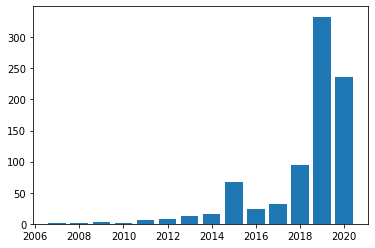

In [5]:
import matplotlib.pyplot as plt

f, axes = plt.subplots()

axes.bar(x=years.index, height=years.loc[:, 'newspaper'])

In [6]:
lens = groupby_newspaper(df)

In [7]:
lens

,newspaper,average_article_length,article_count
0,fox,624.131673,281
1,guardian,919.611511,278
2,nytimes,1295.969325,163
3,skyau,126.535088,114


In [8]:
lens.to_dict(orient='records')

[{'newspaper': 'fox',
  'average_article_length': 624.1316725978647,
  'article_count': 281},
 {'newspaper': 'guardian',
  'average_article_length': 919.6115107913669,
  'article_count': 278},
 {'newspaper': 'nytimes',
  'average_article_length': 1295.9693251533743,
  'article_count': 163},
 {'newspaper': 'skyau',
  'average_article_length': 126.53508771929825,
  'article_count': 114}]